# Úvod - reprezentace obrazu v počítači a knihovna `opencv`

## Obraz v počítači - Jak si ho představit
- Digitální obraz se skládá z pixelů
- Nejčastěji se setkáme s uspořádáním pixelů do klasické mřížky (budeme používat termín matice)
- Počet pixelů je dán rozlišením obrázku. Např. 1920 x 1080, což znamená že obraz je tvořen cca 2,1 Mpixely (2 073 600 pixelů)
- Výsledná barva jednotlivých pixelů odpovídá jejich matematickým hodnotám - pokud by například byly všechny hodnoty rovny 0, dostaneme černý obraz

## Typy obrazů
- Nejjednodušší obraz je tzv. binární, skládající se pouze z černé a bílé (neplést s monochrome) 
    - Každý pixel obsahuje buď 1 (bílá) nebo 0 (černá)
- Další už složitější možností je klasický černobílý (neboli "v odstínech šedi") obrázek, který je tvořen různými odstíny mezi černou a bílou
    - Pixely mohou tedy obsahovat hodnoty od 0 do 1, je tedy např. přípustná hodnota 0,5
- Barevný obraz je v počítačové grafice většinou ze 3 různých barev - Red, Green, Blue (červená, zelená, modrá)
    - Pro každou barvu potřebujeme jednu matici a jejich složení udává výsledný obraz
    - Znáte například pokud smícháte červenou a zelenou, tak získáte žlutou

In [47]:
# import knihoven
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

## Načtení obrázku ze souboru a zobrazení

In [48]:
# cesta k obrázku
path_to_img = os.path.join("data","kytka.jpg") # obrázek je uložen na cestě: data/kytka.jpg

#Načtení barevného obrázku
img = cv2.imread(path_to_img, cv2.IMREAD_COLOR) # barevně, ale BGR
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # knihovna CV2 používá BGR formát, zatímco matplotlib RGB

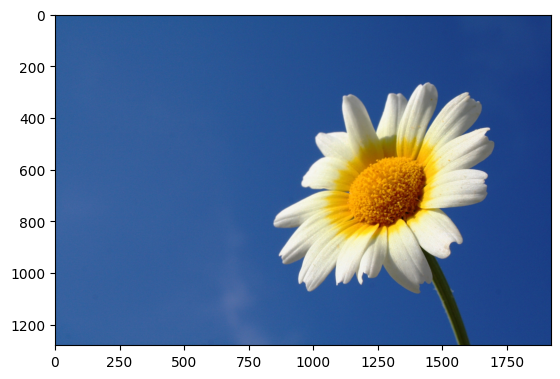

In [49]:
plt.imshow(img)

## Vytvoříme kopii a odstaníme R a G kanál

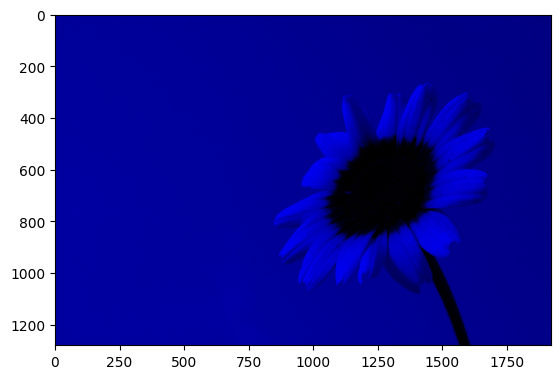

In [50]:
img_copy = img.copy()
img_copy[:,:,:2] = 0 # yku
plt.imshow(img_copy)

### Zkuste vy
1. zkuste zobrazit jenom červený kanál
1. místo vymazání dvou kanálů, vymažte horní polovinu obrázku a výsledek zobrazte

## Převod barevného obrázku na tzv grayscale (stupně šedi)

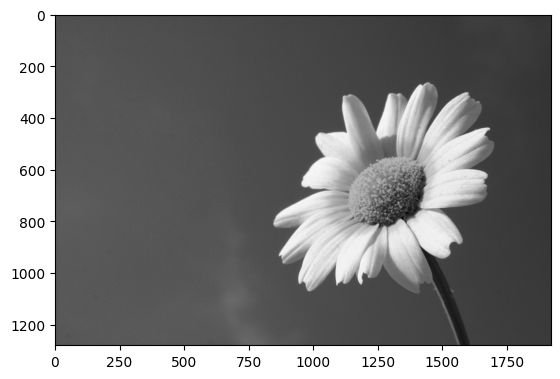

In [51]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray, cmap="gray")

## Zmenšení/zvětšení obrázku

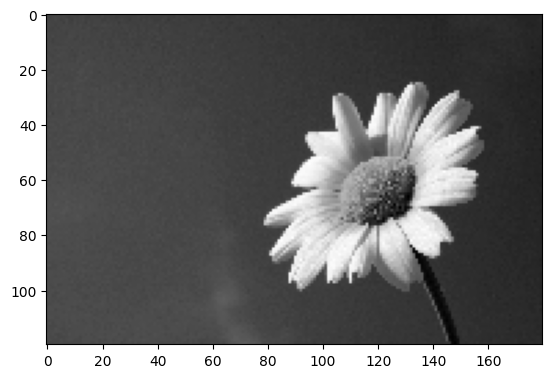

In [52]:
img_gray_small = cv2.resize(img_gray, dsize=(180, 120))
plt.imshow(img_gray_small, cmap="gray")

## Binární obrázek (tzv. prahování)

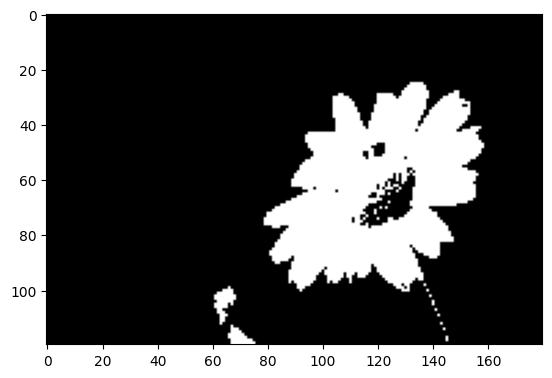

In [53]:
_, img_binary = cv2.threshold(img_gray_small, 100, 255, cv2.THRESH_BINARY) # stupně šedi jsou 0 - 255
plt.imshow(img_binary, cmap="gray", vmin=0, vmax=255)

## Vytvoření binárního obrázku

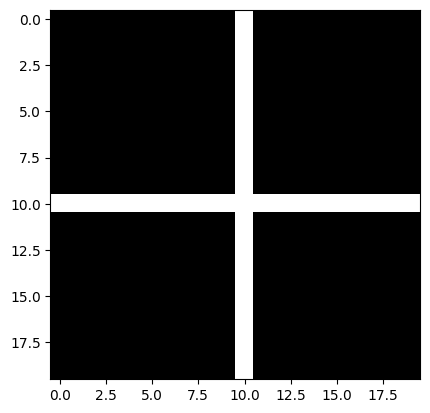

In [54]:
img_random = np.zeros(shape=(20,20)) # hodnoty 0 - 1
img_random[:,10] = 1
img_random[10,:] = 1
plt.imshow(img_random, cmap="gray", vmin=0, vmax=1) # náhodný obrázek 20 x 20 pixelů

## Zkuste vy

1. vytvořte náhodný obrázek (stupně šedi) 20 x 20 pixelů pomocí `np.random.rand(20,20)` a zobrazte ho
1. převeďte všechny pixely s hodnotou (intenzitou) menší než 0.5 do hodnoty 0 a hodnoty větší nebo rovno 0.5 do hodnoty 1, zobrazte
1. přehodtě bílou a černou z předchozího úkolu
1. vytvořte šachovnici 8x8